In [1]:
import yaml
import xarray as xr
import matplotlib.pyplot as plt

diagname  = 'teleconnections'
machine   = 'wilma'
telecname = 'NAO'

with open(f'../../config/config_{machine}.yml', 'r', encoding='utf-8') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

with open(f'{diagname}.yml', 'r', encoding='utf-8') as file:
    namelist = yaml.load(file, Loader=yaml.FullLoader)

## Open index dataset and msl data

<AxesSubplot: xlabel='time'>

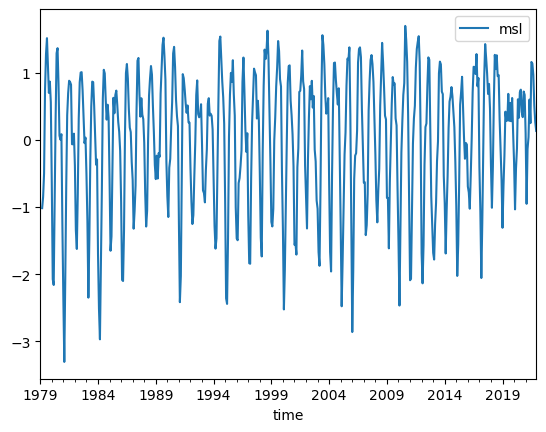

In [15]:
# Create name
infile = config[diagname]['output']
infile = infile + "/NAO_indx.nc"

# Open dataset
indx = xr.open_mfdataset(infile)

# Convert to dataframe
indx = indx.to_dataframe()

# Check data
indx.plot()

In [2]:
# Generate name for msl data and open them
infile = config[diagname]['input']

field = xr.open_mfdataset(infile)['msl']

## Correlation map